In [2]:
!pip install xarray[complete]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.5/47.5 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 8.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.0/70.0 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 15.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.6/64.6 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.6/210.6 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 17.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.6/40.6 kB 4.6 MB/s eta 0:00:00
  Created wheel for asciitree: filename=asciitree-0.3.3-py3-none-any.whl size=5034 sha256=8c56184415d32e62e125259ad8db92db263e1b7bf046e0d6a54329f54b

In [3]:
import glob
import matplotlib.pyplot as plt
import urllib.request
import xarray as xr

In [20]:
for yr in range(2011,2015): # note that in python, the end range is not inclusive. So, in this case data for 2015 is not downloaded.
    url = f'https://downloads.psl.noaa.gov/Datasets/cpc_us_precip/RT/precip.V1.0.{yr}.nc'
    print(url)
    savename = url.split('/')[-1]
    print(savename)
    urllib.request.urlretrieve(url,savename)

https://downloads.psl.noaa.gov/Datasets/cpc_us_precip/RT/precip.V1.0.2011.nc
precip.V1.0.2011.nc
https://downloads.psl.noaa.gov/Datasets/cpc_us_precip/RT/precip.V1.0.2012.nc
precip.V1.0.2012.nc
https://downloads.psl.noaa.gov/Datasets/cpc_us_precip/RT/precip.V1.0.2013.nc
precip.V1.0.2013.nc
https://downloads.psl.noaa.gov/Datasets/cpc_us_precip/RT/precip.V1.0.2014.nc
precip.V1.0.2014.nc


In [5]:
ds2011 = xr.open_dataset('precip.V1.0.2011.nc')
ds2012 = xr.open_dataset('precip.V1.0.2012.nc')

In [7]:
ds2012

<xarray.Dataset>
Dimensions:  (lat: 120, lon: 300, time: 366)
Coordinates:
  * lat      (lat) float32 20.12 20.38 20.62 20.88 ... 49.12 49.38 49.62 49.88
  * lon      (lon) float32 230.1 230.4 230.6 230.9 ... 304.1 304.4 304.6 304.9
  * time     (time) datetime64[ns] 2012-01-01 2012-01-02 ... 2012-12-31
Data variables:
    precip   (time, lat, lon) float32 ...
Attributes:
    title:          CPC Unified Gauge-Based Analysis of Daily Precipitation o...
    Conventions:    COARDS
    description:    Gridded daily Precipitation
    platform:       Observations
    Comments:       Preciptation is accumulated from 12z of previous day to 1...
    history:        originally created RT starting 04/2010 by CAS from data o...
    dataset_title:  CPC Unified Gauge-Based Analysis of Daily Precipitation o...
    References:     http://www.psl.noaa.gov/data/gridded/data.unified.daily.c...

In [21]:
##EDA o f netCDF 
print(ds2011.dims)

# Variables
print(ds2011.data_vars)

# Global Attributes
print(ds2011.attrs)

Frozen({'lat': 120, 'lon': 300, 'time': 365})
Data variables:
    precip   (time, lat, lon) float32 ...
{'title': 'CPC Unified Gauge-Based Analysis of Daily Precipitation over CONUS RT at PSD', 'Conventions': 'COARDS', 'description': 'Gridded daily Precipitation', 'platform': 'Observations', 'Comments': 'Preciptation is accumulated from 12z of previous day to 12z of day stored', 'history': 'originally created RT starting 04/2010 by CAS from data obtained from NCEP/CPC\n converted to unpacked chunked netCDF4 Aug 2014', 'dataset_title': 'CPC Unified Gauge-Based Analysis of Daily Precipitation over CONUS', 'References': 'http://www.psl.noaa.gov/data/gridded/data.unified.daily.conus.rt.html'}


In [28]:
print(ds2012['precip'])

<xarray.DataArray 'precip' (time: 366, lat: 120, lon: 300)>
array([[[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       ...,

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 20.12 20.38 20.62 20.88 ... 49.12 49.38 49.62 49.88
  * lon      (lon) float32 230.1 230.4 230.6 230.9 ... 304.1 304.4 304.6 304.9
  * time     (time) datetime64[ns] 2012-01-01 2012-01-02 ... 2012-12-31
Attributes:
    long_name:     Daily Accumulated 

In [29]:
precip = ds2012['precip']
mean_precip = precip.mean(dim=['time', 'lat', 'lon'])
print("Mean precipitation: \n", mean_precip)

Mean precipitation: 
 <xarray.DataArray 'precip' ()>
array(1.8658615, dtype=float32)


In [30]:
min_precip = precip.min(dim=['time', 'lat', 'lon'])
max_precip = precip.max(dim=['time', 'lat', 'lon'])
std_precip = precip.std(dim=['time', 'lat', 'lon'])

print("Min precipitation: \n", min_precip)
print("Max precipitation: \n", max_precip)
print("Standard deviation of precipitation: \n", std_precip)

Min precipitation: 
 <xarray.DataArray 'precip' ()>
array(0., dtype=float32)
Max precipitation: 
 <xarray.DataArray 'precip' ()>
array(304.60495, dtype=float32)
Standard deviation of precipitation: 
 <xarray.DataArray 'precip' ()>
array(6.075316, dtype=float32)


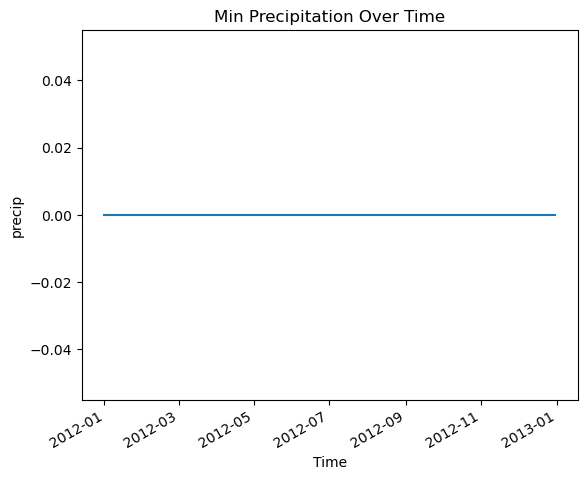

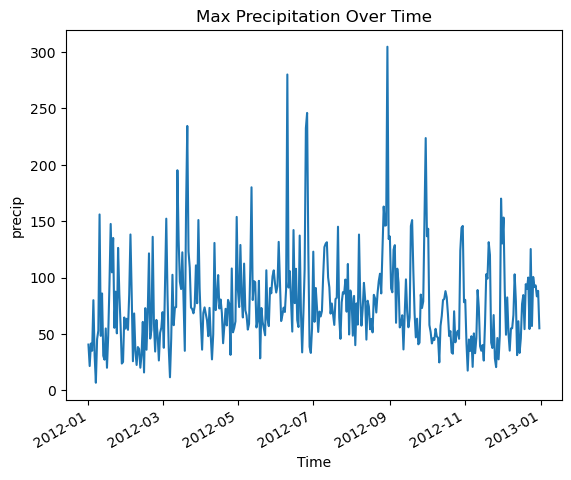

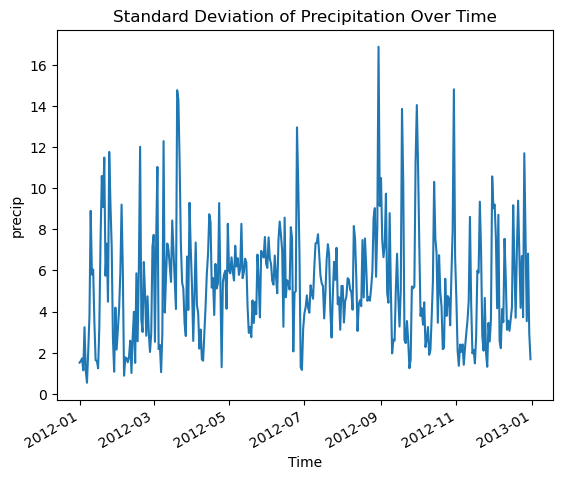

In [31]:
import matplotlib.pyplot as plt

# Min over time (for each time step)
min_precip_time = precip.min(dim=['lat', 'lon'])
min_precip_time.plot(label="Min Precipitation")
plt.title("Min Precipitation Over Time")
plt.show()

# Max over time (for each time step)
max_precip_time = precip.max(dim=['lat', 'lon'])
max_precip_time.plot(label="Max Precipitation")
plt.title("Max Precipitation Over Time")
plt.show()

# Standard deviation over time (for each time step)
std_precip_time = precip.std(dim=['lat', 'lon'])
std_precip_time.plot(label="Standard Deviation of Precipitation")
plt.title("Standard Deviation of Precipitation Over Time")
plt.show()

In [8]:
ds2011_2012 = xr.concat([ds2011,ds2012], dim='time')

In [9]:
ds2011_2012

<xarray.Dataset>
Dimensions:  (lat: 120, lon: 300, time: 731)
Coordinates:
  * lat      (lat) float32 20.12 20.38 20.62 20.88 ... 49.12 49.38 49.62 49.88
  * lon      (lon) float32 230.1 230.4 230.6 230.9 ... 304.1 304.4 304.6 304.9
  * time     (time) datetime64[ns] 2011-01-01 2011-01-02 ... 2012-12-31
Data variables:
    precip   (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
Attributes:
    title:          CPC Unified Gauge-Based Analysis of Daily Precipitation o...
    Conventions:    COARDS
    description:    Gridded daily Precipitation
    platform:       Observations
    Comments:       Preciptation is accumulated from 12z of previous day to 1...
    history:        originally created RT starting 04/2010 by CAS from data o...
    dataset_title:  CPC Unified Gauge-Based Analysis of Daily Precipitation o...
    References:     http://www.psl.noaa.gov/data/gridded/data.unified.daily.c...

In [10]:
ds2011_2014 = xr.open_mfdataset('precip.V1.0.*.nc', concat_dim='time', combine='nested')
# Or, you can use the following command to do the same thing:
# ds2011_2014 = xr.open_mfdataset('precip*.nc', combine='by_coords')


In [11]:
ds2011_2014

<xarray.Dataset>
Dimensions:  (lat: 120, lon: 300, time: 1461)
Coordinates:
  * lat      (lat) float32 20.12 20.38 20.62 20.88 ... 49.12 49.38 49.62 49.88
  * lon      (lon) float32 230.1 230.4 230.6 230.9 ... 304.1 304.4 304.6 304.9
  * time     (time) datetime64[ns] 2011-01-01 2011-01-02 ... 2014-12-31
Data variables:
    precip   (time, lat, lon) float32 dask.array<chunksize=(365, 120, 300), meta=np.ndarray>
Attributes:
    title:          CPC Unified Gauge-Based Analysis of Daily Precipitation o...
    Conventions:    COARDS
    description:    Gridded daily Precipitation
    platform:       Observations
    Comments:       Preciptation is accumulated from 12z of previous day to 1...
    history:        originally created RT starting 04/2010 by CAS from data o...
    dataset_title:  CPC Unified Gauge-Based Analysis of Daily Precipitation o...
    References:     http://www.psl.noaa.gov/data/gridded/data.unified.daily.c...

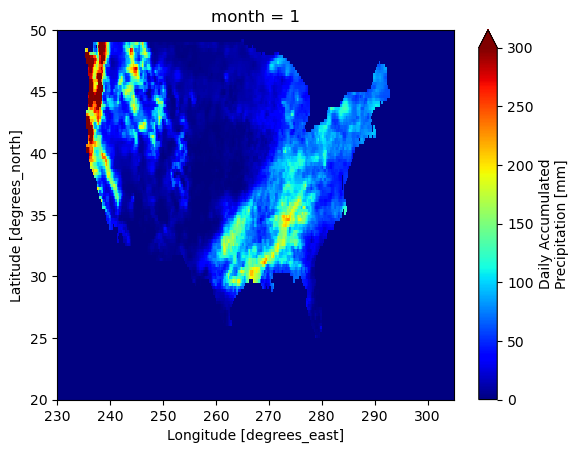

In [12]:
ds2012_mon = ds2012.groupby('time.month').sum()
ds2012_mon.precip[0,:,:].plot(cmap='jet', vmax=300)

In [15]:
import calendar # We'll use this library to easily add month name to subplot titles.

# First, We will develop a land mask data array that we can use to mask out the nan values:
landmask = ds2012.precip.sum(dim='time')>0

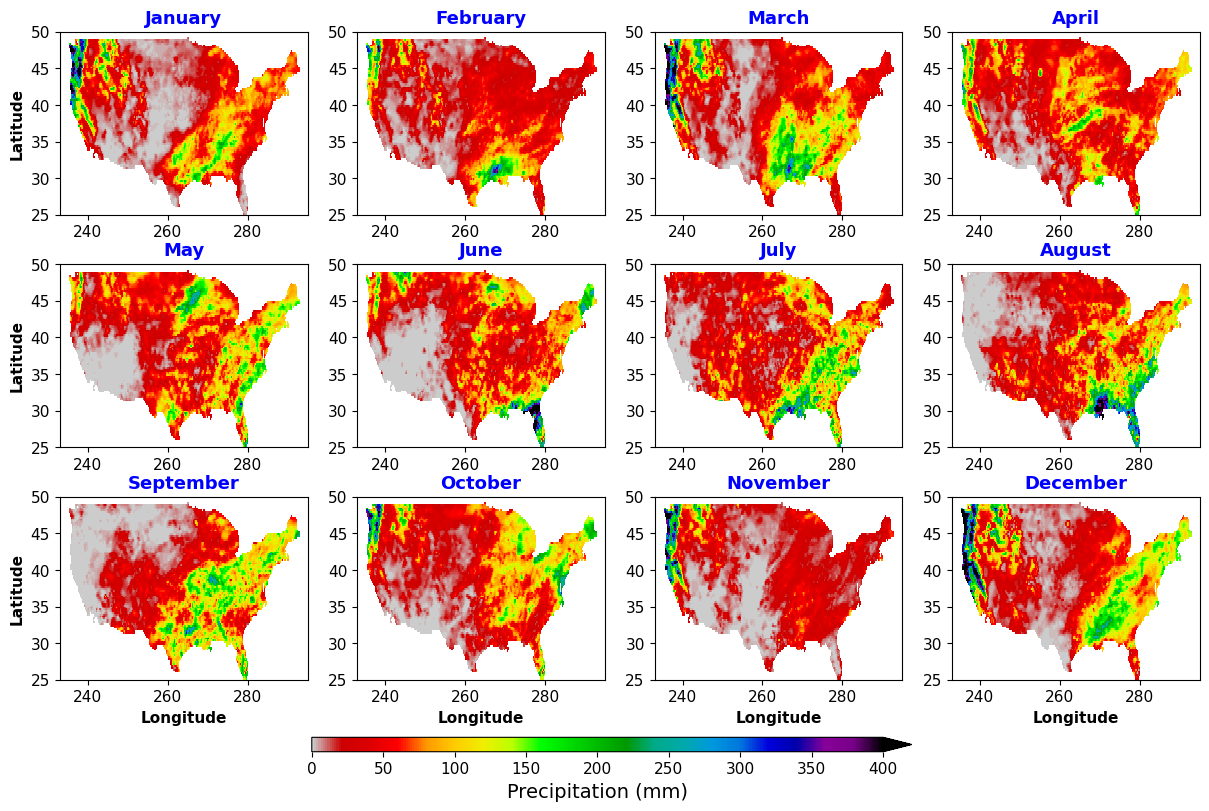

In [16]:
fig = plt.figure(figsize=[12,8], facecolor='w')
plt.subplots_adjust(bottom=0.15, top=0.96, left=0.04, right=0.99,
                    wspace=0.2, hspace=0.27) # wspace and hspace adjust the horizontal and vertical spaces, respectively.
nrows = 3
ncols = 4
for i in range(1, 13):
    plt.subplot(nrows, ncols, i)
    dataplot = ds2012_mon.precip[i-1, :, :].where(landmask) # Remember that in Python, the data index starts at 0, but the subplot index start at 1.
    p = plt.pcolormesh(ds2012_mon.lon, ds2012_mon.lat, dataplot,
                   vmax = 400, vmin = 0, cmap = 'nipy_spectral_r',
                   )
    plt.xlim([233,295])
    plt.ylim([25,50])
    plt.title(calendar.month_name[dataplot.month.values], fontsize = 13,
              fontweight = 'bold', color = 'b')
    plt.xticks(fontsize = 11)
    plt.yticks(fontsize = 11)
    if i % ncols == 1: # Add ylabel for the very left subplots
        plt.ylabel('Latitude', fontsize = 11, fontweight = 'bold')
    if i > ncols*(nrows-1): # Add xlabel for the bottom row subplots
        plt.xlabel('Longitude', fontsize = 11, fontweight = 'bold')

# Add a colorbar at the bottom:
cax = fig.add_axes([0.25, 0.06, 0.5, 0.018])
cb = plt.colorbar(cax=cax, orientation='horizontal', extend = 'max',)
cb.ax.tick_params(labelsize=11)
cb.set_label(label='Precipitation (mm)', color = 'k', size=14)

# Now we can save a high resolution (300dpi) version of the figure:
plt.savefig('Fig_prec_cpc_mon_2012.png', format = 'png', dpi = 300)

In [32]:
# extract data for specific boundary and look at the average condition within that area od interest
top = 40
bottom = 37
left = 258
right = 265.4

In [34]:
ds_sel = ds2011_2014.sel(lon= slice(left, right), lat =slice(bottom, top))
ds_sel_avg = ds_sel.mean(dim=['lat', 'lon'])

In [36]:
ds_sel_avg_noleap = ds_sel_avg.sel(time = ~((ds_sel_avg.time.dt.month==2) & (ds_sel_avg.time.dt.day==29)))

In [37]:
# Here's how the result will look like:
ds_sel_avg_noleap

<xarray.Dataset>
Dimensions:  (time: 1460)
Coordinates:
  * time     (time) datetime64[ns] 2011-01-01 2011-01-02 ... 2014-12-31
Data variables:
    precip   (time) float32 dask.array<chunksize=(365,), meta=np.ndarray>

In [38]:
# Now we can easily save that output as a netcdf file using xarray:
ds_sel_avg_noleap.to_netcdf('ds_prec_Kansas_noleap_2011_2014.nc')

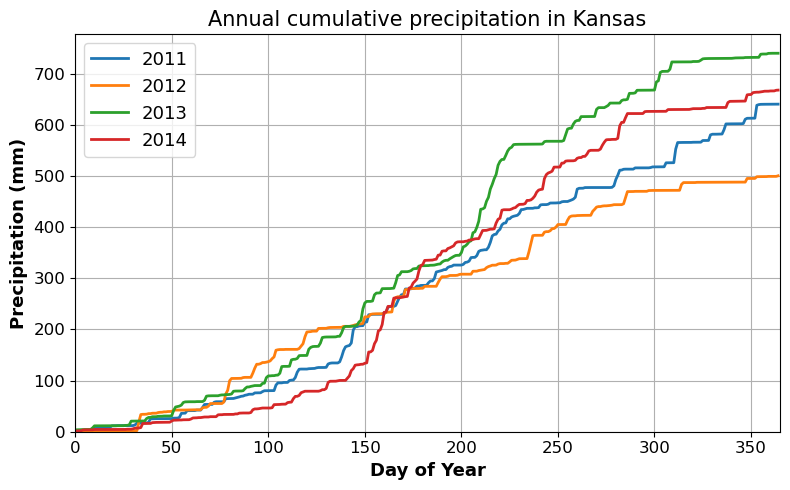

In [39]:
fig = plt.figure(figsize=[8,5], facecolor='w')
for yr in range(2011,2015):
    da_yr = ds_sel_avg_noleap.sel(time = str(yr)).precip
    dataplot = da_yr.cumsum()
    plt.plot(dataplot, linewidth=2, label = yr)
plt.legend(fontsize=13)
plt.grid()
plt.xticks(fontsize=12) # we can also change the ticks to be on Jan-1, Feb-1, etc. but I'll skip it for here.
plt.yticks(fontsize=12)
plt.ylabel('Precipitation (mm)', fontsize = 13, fontweight = 'bold')
plt.xlabel('Day of Year', fontsize = 13, fontweight = 'bold')
plt.xlim([0,365])
plt.ylim(bottom=0)
plt.title('Annual cumulative precipitation in Kansas', fontsize=15)
plt.tight_layout()
plt.savefig('Fig_cumsum_prec_Kansas.png', format = 'png', dpi = 300)